In [56]:
%load_ext autoreload
%autoreload 2
from datasets import Dataset, Image, load_dataset, load_from_disk
import os
from transformers import pipeline
import tqdm
import numpy as np
import sys
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import ImageEnhance
sys.path.append("..")
from utils.data_utils import make_hf_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Make new Dataset

In [20]:
dataset = make_hf_dataset(input_folder='../../data/landsat/inputs', target_folder='../../data/landsat/targets',
                          masks_folder='../../data/landsat/masks',
                           save_to_disk=False, dset_location='../../data/landsat/dset.hf')

Map: 100%|██████████| 9076/9076 [04:01<00:00, 37.64 examples/s] 


In [ ]:
dataset.push_to_hub(f"Kornberg/landsat_captions", token=os.environ['HF_ACCESS_TOKEN'])

## Load dataset from HF

In [57]:
dataset = load_dataset("Kornberg/landsat_captions")

Generating train split: 100%|██████████| 9076/9076 [00:01<00:00, 6827.46 examples/s]


In [65]:
dataset['train']['target']

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image 

In [18]:
dataset = load_from_disk('../../data/landsat/dset.hf')

README.md: 100%|██████████| 354/354 [00:00<00:00, 433kB/s]


In [ ]:
snow_segments, cloud_segments, snow_segments_binary, cloud_segments_binary = np.array(dataset['snow_segments']), np.array(dataset['cloud_segments']), np.array(dataset['snow_segments_binary']), np.array(dataset['cloud_segments_binary'])

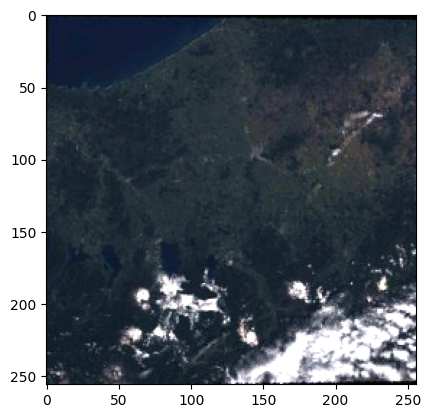

In [16]:
array = cv.imread('../../data/landsat/targets/0009178.jpg')
# show image
plt.imshow((array[:,:,::-1] * 2.6).clip(0,255).astype(np.uint8))


## Test Snowiness

In [55]:
def get_snow_segment_binary(bit_image):
    snow_pixels = (np.right_shift(bit_image,5)&1).sum()
    snow_ratio = snow_pixels / bit_image.size
    print(snow_ratio)
    if snow_ratio < 0.1:
        return 0
    else:
        return 1

In [ ]:
bit_path = '../../data/landsat/masks/0009169.npy'
bits = np.load(bit_path)
get_snow_segment_binary(bits)